<a href="https://colab.research.google.com/github/ankitshripalsingh/Operations-Research/blob/main/Warehouse%20Graded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warehouse Problem 

##  Problem Statement

Suppose that you're working as an operations manager at Amazon. You work in a smaller city so a lot of the goods have to be shipped from outside. The city has two docks from where you transfer the goods into three different warehouses located in the city. The cost of transporting 100kgs of goods at once from the two docks to the three different warehouses is shown in the chart below. The chart also shows the capacity of each warehouse.






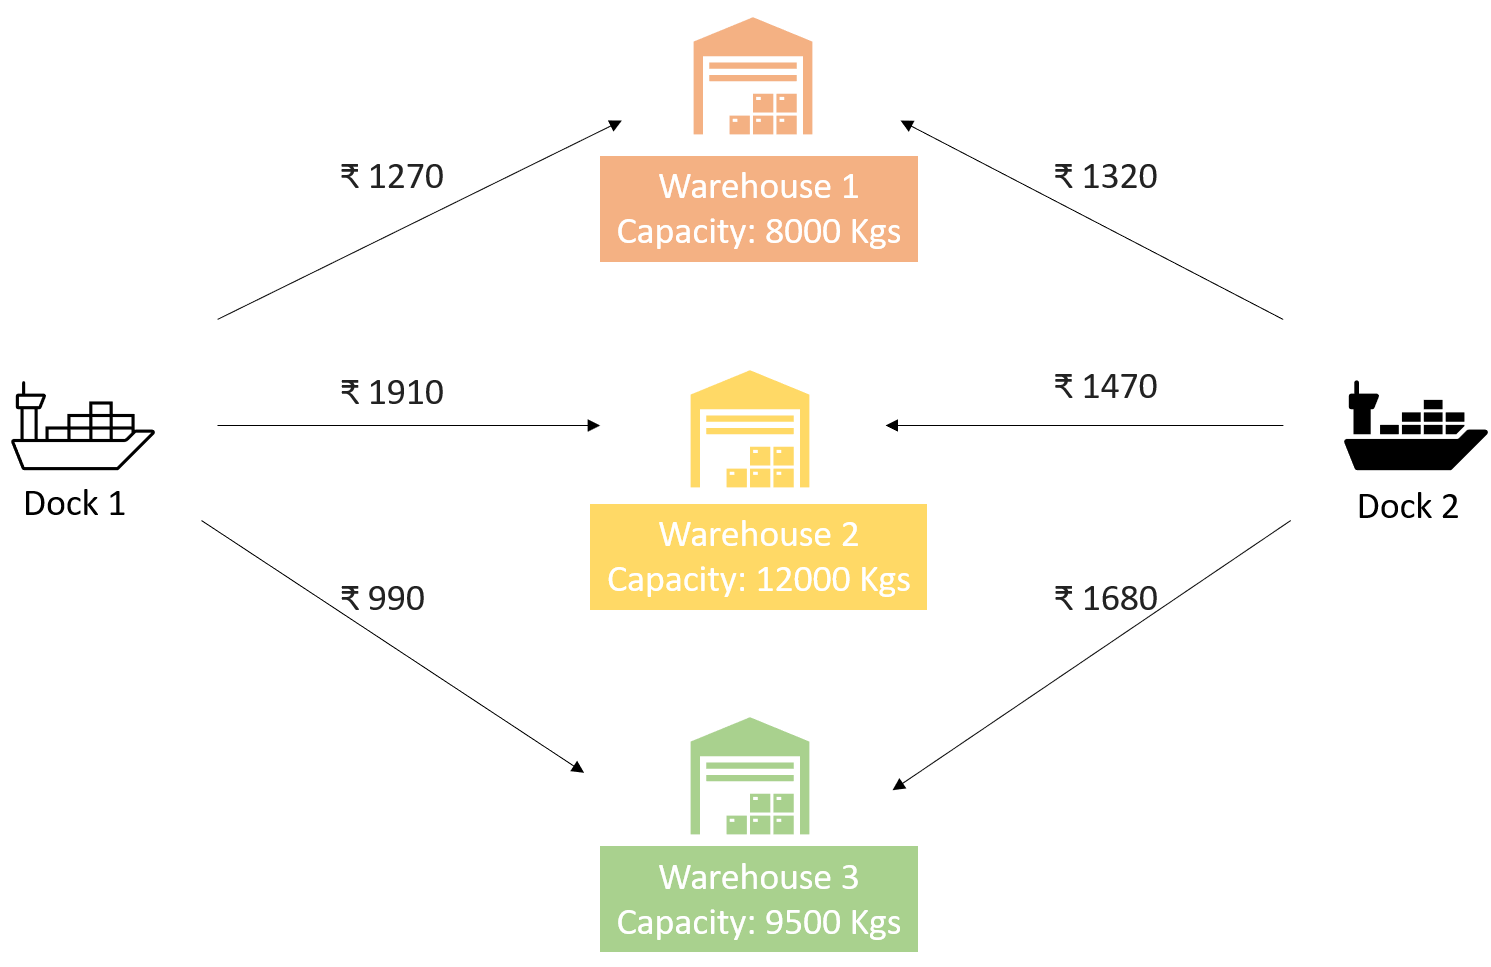

In [1]:
!pip install -q pyomo
!apt-get install -y -qq coinor-cbc
!apt-get install -y -qq glpk-utils

     |████████████████████████████████| 9.6 MB 26.5 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to un

### Step1:
<b> Import Pyomo Enviornment </b>

In [2]:
from pyomo.environ import *
import pandas as pd

### Step2:
<b>Specify / import data</b>

In [3]:
#List of Docks
D = ['D1', 'D2']

#List of warehouses
W = ['W1', 'W2', 'W3']

#Parameter - capacity of each warehouse
capacity = {'W1': 8000, 'W2': 12000, 'W3': 9500}

#Cost of transporting per 100kg          
cost_per_100kg = {('D1','W1'): 1270, ('D1','W2'): 1910, ('D1','W3'): 990,\
      ('D2','W1'): 1320,('D2','W2'): 1470, ('D2','W3'): 1680}

#Supply from each dock
supply = {'D1': 10500, 'D2': 5500}

#Minimum capacity of each warehouse
min_capacity=0.20

### Step3:
<b> Create Model Object</b>

In [11]:
model = ConcreteModel()

### Step4:
<b>Define Decision Variable</b>

In [12]:
# The kgs of goods to be transferred from different docks to different warehouses
model.x = Var(D, W, within = PositiveIntegers)

### Step5:
<b>Define Objective</b>

In [13]:
# Minimum cost in which you can transfer all the incoming goods
def obj_rule(model):
    return(sum(model.x[d,w]*cost_per_100kg[d,w]/100 for d in D for w in W))

In [14]:
# Defining the objective function
model.value = Objective(rule = obj_rule, sense = minimize)

### Step6:
<b>Define Constraints</b>

In [15]:
#Supply constraint of the docks

def dock_supply(model, d):
    return(sum(model.x[d,w] for w in W) == supply[d])
                
model.supply = Constraint(D, rule = dock_supply)


#capacity constraint of the warehouse

def warehouse_capacity(model, w):
    return(sum(model.x[d,w] for d in D) <= capacity[w])
        
model.capacity = Constraint(W, rule = warehouse_capacity)

 
# warehouse should be filled to at least 20% of its capacity

def warehouse_min_load(model, w):
    return(sum(model.x[d,w] for d in D) >= 0.2 * capacity[w])

model.min_load = Constraint(W, rule = warehouse_min_load)


### Step7:
<b>Create solver & solve model </b><br>
Note: It is important to know if you have created a liner(LP), integer(IP), mixed integer(MIP), non-linear (NLP), or mixed integer non-linear (MINLP) model and choose the most suitable solver accordingly. We have setup glpk for LP, IP and MIP type problems and ipopt for NLP type.

In [16]:
# Invoking the solver
result = SolverFactory('glpk').solve(model)
result.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 182961.3
  Upper bound: 182961.3
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 7
  Number of nonzeros: 19
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.013736248016357422
# ----------------------------------------------------------
#   Solution Information
# -----------------------------

### Step8:
<b>Display Results </b>

In [17]:
model.pprint()

6 Set Declarations
    capacity_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'W1', 'W2', 'W3'}
    min_load_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'W1', 'W2', 'W3'}
    supply_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'D1', 'D2'}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :    6 : {('D1', 'W1'), ('D1', 'W2'), ('D1', 'W3'), ('D2', 'W1'), ('D2', 'W2'), ('D2', 'W3')}
    x_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'D1', 'D2'}
    x_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members

In [18]:
model.value()

182961.3